<a href="https://colab.research.google.com/github/AbuObaida01/Week-1/blob/main/WEEK1_SMART_ENERGY_CONSUMPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Energy Consumption


### **Problem Statement:**

Todays world do not focus on how they are using electricity. Sometime they leave it running without thinking how it will effect the need of future generation and their pocket. This ML model will help to analyze individual household electricity consumption data to identify usage patterns and optimize energy efficiency. Using daily consumption records with household characteristics such as how different applaince usage can affect electric usage to develop insights and prepare data for building an AI-powered recommendation system to reduce household energy costs and improve sustainability.


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime

print("Done")

Done


### Dataset Overview

Source: https://www.kaggle.com/datasets/thedevastator/240000-household-electricity-consumption-records  
File: household_power_consumption.csv

This kaggle dataset contains records 1 HouseHold Electricity Consumption but for over 6 months.

It contains total of 240000+ measurements for overall

This kaggle dataset contains records of thousands of household

Like:

1.   Time:  (The date of the observation)
2.   Date: (The time of the observation)

1.   Global Active Power: (The total active power consumed by the household (kilowatts))

2.   Global Reactive Power: (The total reactive power consumed by the household (kilowatts))

1.   Voltage: (The voltage at which the electricity is delivered to the household (volts))
2.   Global Intensity: (The average current intensity delivered to the household (amps))

1.   Sub_metering_1: (The active power consumed by the kitchen (kilowatts)).
8.   Sub_metering_2: (The active power consumed by the laundry room (kilowatts).)
9.   Sub_metering_3: (The active power consumed by the electric water heater and air conditioner (kilowatts). )















In [ ]:
# This will load the household energy consumption dataset to let us look how exactly the data look.

df = pd.read_csv('household_power_consumption.csv')
print(f"Dataset shape: {df.shape}")

#To look some rows to exactly to know how the dataset looks
df.head()



Dataset shape: (260640, 10)


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


### Inspecting the data structure

In [ ]:
# This will tell the data structure of the dataset.
print("Columns:")
print(df.columns.tolist())
print(f"/nData Types:")
print(df.dtypes)

# To check how the dataset is spread in terms of dates and how many unique dates
print(f"Date Range:")
print(f"Start date: {df['Date'].iloc[0]} at {df['Time'].iloc[0]}")
print(f"End date: {df['Date'].iloc[-1]} at {df['Time'].iloc[-1]}")
print(f"Unique dates: {df['Date'].nunique():,}")

# To check how we calculate data in regarding of time
print(f"\nTime Range:")
print(f"Unique time: {df['Time'].nunique():,}")
print(f"Time start and end: {df['Time'].min()} to {df['Time'].max()}")

#Sample values of each data
print(f"\nSample Values from each Columns:")
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_cols:
    unique_vals = df[col].unique()[:5]
    print(f"{col}: {unique_vals}")



Columns:
['index', 'Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
/nData Types:
index                      int64
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
Date Range:
Start date: 1/1/07 at 0:00:00
End date: 30/6/2007 at 23:59:00
Unique dates: 181

Time Range:
Unique time: 1,440
Time start and end: 0:00:00 to 9:59:00

Sample Values from each Columns:
Global_active_power: ['2.58' '2.552' '2.55' '2.554' '2.534']
Global_reactive_power: ['0.136' '0.1' '0.096' '0' '0.092']
Voltage: ['241.97' '241.75' '241.64' '241.71' '241.98']
Global_intensity: ['10.6' '10.4' '10.2' '11' '10.8']
Sub_metering_1: ['0' '1' '2' '11' '39']
Sub_mete

### Checking For Missing Values

In [ ]:
missing_summary = {}
for col in df.columns:
  missing_count = sum(df[col].isin(['NaN', '', '?']))

  missing_percentage = (missing_count / len(df)) * 100
  missing_summary[col] = {
        'count': missing_count,
        'percentage': missing_percentage
    }
  print(f"{col:<20}: {missing_count:>8,} ({missing_percentage:>6.2f}%)")
# Total missing values
total_missing = sum([data['count'] for data in missing_summary.values()])
total_percentage = (total_missing / (len(df) * len(df.columns))) * 100
print(f"\nMissing Values Summary:")
print(f"Missing values: {total_missing:,}")
print(f"Total missing percentage: {total_percentage:.2f}%")

index               :        0 (  0.00%)
Date                :        0 (  0.00%)
Time                :        0 (  0.00%)
Global_active_power :    3,771 (  1.45%)
Global_reactive_power:    3,771 (  1.45%)
Voltage             :    3,771 (  1.45%)
Global_intensity    :    3,771 (  1.45%)
Sub_metering_1      :    3,771 (  1.45%)
Sub_metering_2      :    3,771 (  1.45%)
Sub_metering_3      :        0 (  0.00%)

Missing Values Summary:
Missing values: 22,626
Total missing percentage: 0.87%


### Basic Data Cleaning
This part of cell is used to remove all the missing values that we got in the upper cell to make our dataset more reliable and usable to let the ml understand it and learn on it.

It also helps in getting accurate energy consumptions.

In [ ]:
df_clean = df.copy()
# To write date and time in same line to make it more undersatndable for ml model.
print("Merging Date and Time")
df_clean['DateTime'] = pd.to_datetime(df_clean['Date']+' '+ df_clean['Time'],format='%d/%m/%Y %H:%M:%S',errors='coerce')

# Drop rows with invalid DateTime as they cannot be used for ML
# This block is usd because we use errors='coerce' in the above code which just change invalid date to NaN
invalid_datetime_rows = df_clean['DateTime'].isna().sum()
df_clean = df_clean.dropna(subset=['DateTime'])
print(f"Removed invalid DateTime rows:{invalid_datetime_rows:,}")

#WE WILL CONVERT ALL THE ? TO NaN because pandas only recognise NaN instead of ?
print("Converting")
df_clean = df_clean.replace('?',np.nan)
#This process is necessary because the values are already in strings and to perform action and applying maths we need them in numeric
print("Converting to numeric")
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
#Since we already merge date and time together then we do not need another coloumn of date and time.
print("Removing date and time coloumn")
df_clean = df_clean.drop(['Date','Time'],axis=1)
#First we need to do missing_before_imputation to know how many missing values are their.
print("Flling Missing value using imputation")
missing_before_imputation = df_clean[numeric_columns].isnull().sum()
print("Before applying imputation")
for col,missing in missing_before_imputation.items():
    if missing > 0:
        print(f"{col}:{missing:,}") #Tis is only for visibility
#First we will sort the dataset according to dateTime
#Then we will fill the missing values with the value above it or
#take the mean of coloumn if it is still missing
df_clean = df_clean.sort_values('DateTime')
for col in numeric_columns:
    df_clean[col] = df_clean[col].ffill()
    if df_clean[col].isnull().sum() > 0:
        mean_value = df_clean[col].mean()
        df_clean[col] = df_clean[col].fillna(mean_value)
missing_after_imputation = df_clean[numeric_columns].isnull().sum()
print("After applying imputation")
for col, missing in missing_after_imputation.items():
    print(f"{col}:{missing:,}") #This is only for visibility
#Now we will make time-based new features such as dayOfWeek, weekends, months, dayOfYear etc.
# to numeric because it wll be easier for ml to understand and amke a good model based on month of year what weekday or what time
print("Creating time-based features")
df_clean['Hour'] = df_clean['DateTime'].dt.hour
df_clean['DayOfWeek'] = df_clean['DateTime'].dt.dayofweek
df_clean['Month'] = df_clean['DateTime'].dt.month
df_clean['DayOfYear'] = df_clean['DateTime'].dt.dayofyear
df_clean['IsWeekend'] = (df_clean['DayOfWeek'] >= 5).astype(int)

print("Creating derived energy features")
#Making a new coloumn named as Total_SubMetering to get total at once instead of looking three differnet coloumns
df_clean['Total_Submetering'] = (df_clean['Sub_metering_1'] +
                                df_clean['Sub_metering_2'] +
                                df_clean['Sub_metering_3'])
#Now we are creating a new coloumn named as Power_Factor which will tell how efficiently electrical power are being used
df_clean['Power_Factor'] = np.where(
    (df_clean['Global_active_power'] > 0) & (df_clean['Global_reactive_power'] > 0),
    df_clean['Global_active_power'] / np.sqrt(df_clean['Global_active_power']**2 + df_clean['Global_reactive_power']**2),
    np.nan
)
#Now we will remove all the missing or NaN we get in power factor
df_clean['Power_Factor'] = df_clean['Power_Factor'].fillna(df_clean['Power_Factor'].mean())
print("\nDATA CLEANING COMPLETED!")

before_datetime_cleanup = len(df)
after_datetime_cleanup = len(df_clean)
datetime_removed = before_datetime_cleanup - after_datetime_cleanup

print(f"Original dataset{before_datetime_cleanup:,}rows")
print(f"After DateTime cleanup{after_datetime_cleanup:,}rows")
print(f"Removed invalid DateTime rows{datetime_removed:,}")
print(f"Final cleaned dataset{len(df_clean):,}rows")
print(f"Date range{df_clean['DateTime'].min()} to {df_clean['DateTime'].max()}")
print(f"Time span{(df_clean['DateTime'].max() - df_clean['DateTime'].min()).days} days")
print(f"\nFinal Dataset Structure:")
print(f"Shape{df_clean.shape}")
print(f"Total features{len(df_clean.columns)}")
total_missing_final = df_clean.isnull().sum().sum()
data_completeness = ((len(df_clean) * len(df_clean.columns) - total_missing_final) /
                    (len(df_clean) * len(df_clean.columns))) * 100

print(f"\nFINAL DATA QUALITY:")
print(f"Remaining missing values: {total_missing_final:,}")
print(f"Data completeness: {data_completeness:.2f}%")

if total_missing_final == 0:
    print("Perfect! No missing values remaining!")
else:
    print(f"Still have {total_missing_final:,} missing values to address")

print(f"\nFinal Data Types:")
print(df_clean.dtypes)
# To see how my new copy looks
df_clean.head()


Merging Date and Time
Removed invalid DateTime rows:103,680
Converting
Converting to numeric
Removing date and time coloumn
Flling Missing value using imputation
Before applying imputation
Global_active_power:3,731
Global_reactive_power:3,731
Voltage:3,731
Global_intensity:3,731
Sub_metering_1:3,731
Sub_metering_2:3,731
Sub_metering_3:3,731
After applying imputation
Global_active_power:0
Global_reactive_power:0
Voltage:0
Global_intensity:0
Sub_metering_1:0
Sub_metering_2:0
Sub_metering_3:0
Creating time-based features
Creating derived energy features

DATA CLEANING COMPLETED!
Original dataset260,640rows
After DateTime cleanup156,960rows
Removed invalid DateTime rows103,680
Final cleaned dataset156,960rows
Date range2007-01-13 00:00:00 to 2007-06-30 23:59:00
Time span168 days

Final Dataset Structure:
Shape(156960, 16)
Total features16

FINAL DATA QUALITY:
Remaining missing values: 0
Data completeness: 100.00%
Perfect! No missing values remaining!

Final Data Types:
index               

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Hour,DayOfWeek,Month,DayOfYear,IsWeekend,Total_Submetering,Power_Factor
17280,17280,0.220,0.0,242.11,1.0,0.0,0.0,0.0,2007-01-13 00:00:00,0,5,1,13,1,0.0,0.947998
17281,17281,0.222,0.0,243.14,1.0,0.0,0.0,0.0,2007-01-13 00:01:00,0,5,1,13,1,0.0,0.947998
17282,17282,0.222,0.0,243.62,1.0,0.0,0.0,0.0,2007-01-13 00:02:00,0,5,1,13,1,0.0,0.947998
17283,17283,0.220,0.0,242.77,1.0,0.0,0.0,0.0,2007-01-13 00:03:00,0,5,1,13,1,0.0,0.947998
17284,17284,0.220,0.0,242.95,1.0,0.0,0.0,0.0,2007-01-13 00:04:00,0,5,1,13,1,0.0,0.947998


### Data Splitiing

In [ ]:
#First we will sort data in chronological order in order of datetime.
df_clean = df_clean.sort_values('DateTime').reset_index(drop=True)

#Now we will split the dataset into two parts
#one for datat testing while other for data training
#testing will be 25% while training will be 75% . i use this split because my dataset consist of more than 100k datas
# It will also make testing more precise
split_ratio = 0.75
split_index = int(len(df_clean) * split_ratio)
train_data = df_clean[:split_index]
test_data = df_clean[split_index:]

#This portion is only to give summary how after splitting data will look like
# print(f"Total records: {len(df_clean):,}")
print(f"Training records: {len(train_data):,} ({len(train_data)/len(df_clean)*100:.1f}%)")
print(f"Testing records: {len(test_data):,} ({len(test_data)/len(df_clean)*100:.1f}%)")

# print(f"Training days:{(train_data['DateTime'].max() - train_data['DateTime'].min()).days} days")
# print(f"Testing days: {(test_data['DateTime'].max() - test_data['DateTime'].min()).days} days")

# Define features and target for machine learning
feature_columns = ['Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','Hour', 'DayOfWeek', 'Month', 'IsWeekend']
target_column = 'Global_active_power'
print(f"Target:{target_column}")
print(f"features:{len(feature_columns)}")
print(f"columns:{feature_columns}")

#TO CHECK THAT IF THE DATSET IS READY FOR MACHINE LEARNING MEANS IT DOESNT HAVE ANY MISSING VALUES
print(f"\nData Quality")
print(f"Training set: {train_data[target_column].isnull().sum():,}")
print(f"Testing set: {test_data[target_column].isnull().sum():,}")

feature_missing = train_data[feature_columns].isnull().sum()
print(f"Training features missing values:")
for feature, missing in feature_missing.items():
    if missing > 0:
        print(f"  {feature}: {missing:,}")

print(f"Tiill Data Splitting Everything is completed ")
print(f"After This I will Start for week 2")


Training records: 117,720 (75.0%)
Testing records: 39,240 (25.0%)
Target:Global_active_power
features:10
columns:['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hour', 'DayOfWeek', 'Month', 'IsWeekend']

Data Quality
Training set: 0
Testing set: 0
Training features missing values:
Tiill Data Splitting Everything is completed 
After This I will Start for week 2


### Week 1 End
This is the end of week 1 task from my side

In this notebook I did basic data cleaning and making it ready for further machine learning operations.

I did Data Cleaning, Data Splitting aside of Data Collection and Data Understanding.

I think it will complete 30% of the whole work that was provided by our mentor for week 1.

## Week 2
From here week 2 will start which will consist of:
1. Identifying the type of machine learning algorithm.
2. To implement that machine learning algorithm
3. Model Evolution.

### Identifying the machine learning type
Since our dataset consist of input as well as output, which clearly shows that our data is labelled and comes under supervised learning.

Even in Supervised learning we are going to use linear regression algorithm because it is fast and easily interpretable.

### Imporing required libraries for our linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
print("Done")

Done


In [ ]:
df_clean.to_csv('cleaned_household_power_consumption.csv', index=False)


### Data Preparation

In [ ]:
# Loading cleaned data
df = pd.read_csv('cleaned_household_power_consumption.csv')

# define features and targets
features = ['Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Hour', 'DayOfWeek', 'Month', 'IsWeekend']
target = 'Global_active_power'
# We are seprating features and target in the term of x and y.
X = df[features]
y = df[target]

print(f"Prepared {X.shape[0]} rows and {len(features)} features for modeling.")


Prepared 156960 rows and 10 features for modeling.


### Testing and training

In [ ]:
split_idx = int(len(df) * 0.75)
X_train = X.iloc[:split_idx, :]
X_test  = X.iloc[split_idx:, :]
y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


### Implementing lienar regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

joblib.dump(lr, 'linear_regression_energy.pkl')

print("Linear Regression model trained and saved.")


Linear Regression model trained and saved.


In [ ]:
y_pred

array([0.31093906, 0.31098133, 0.31227575, ..., 2.83809704, 2.64726772,
       2.49519528])

### Evaluating The Model

Linear Regression Evaluation:
 - Mean Squared Error (MSE): 0.001835
 - Mean Absolute Error (MAE): 0.027622
 - R^2 Score: 0.998097


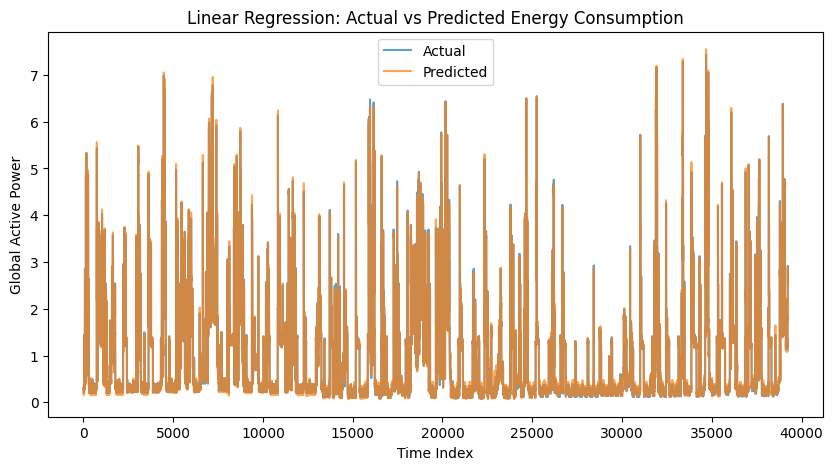

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Evaluation:")
print(f" - Mean Squared Error (MSE): {mse:.6f}")
print(f" - Mean Absolute Error (MAE): {mae:.6f}")
print(f" - R^2 Score: {r2:.6f}")

# Just to look how our linear regression graph looks
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Linear Regression: Actual vs Predicted Energy Consumption')
plt.xlabel('Time Index')
plt.ylabel('Global Active Power')
plt.show()
